In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [94]:
df = pd.read_csv("StudentsPerformance.csv")

In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [97]:
sns.boxplot(df['math score'])

<Axes: ylabel='math score'>

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [99]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

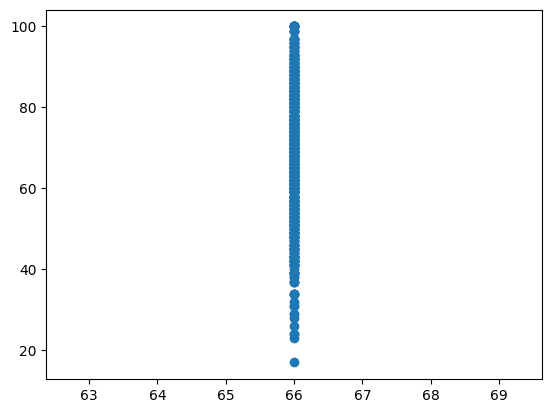

In [108]:
plt.scatter(df['math score'],df['reading score'])
plt.show()

In [101]:
z_score = (df['math score']-df['math score'].mean()) / df['math score'].std()
threashold = 3
outlier = df[np.abs(z_score)>threashold]
print(outlier)

     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
787  female        group B                some college      standard   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
787                    none          19             38             32  
980                    none           8             24             23  


In [102]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = df[ (df['math score'] < lower_bound) | (df['math score'] > upper_bound) ]

print(outlier)

     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38         

In [103]:
z_score = (df['math score']-df['math score'].mean()) / df['math score'].std()
threashold = 3
outlier = df[np.abs(z_score)<=threashold]
print(outlier)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [104]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = df[ (df['math score'] >= lower_bound) | (df['math score'] <= upper_bound) ]

print(outlier)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

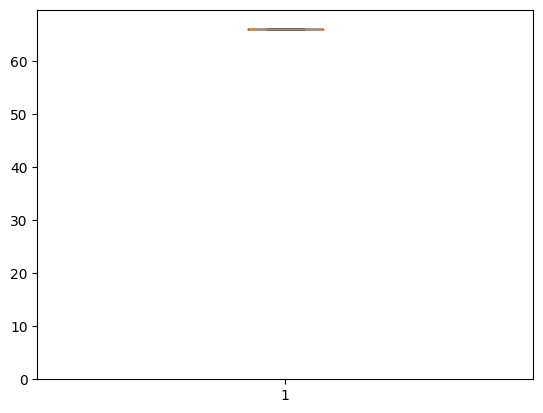

In [107]:
median = df['math score'].median()

df.loc[df['math score']>=66,'math score']=median
plt.boxplot(df['math score'])
plt.yticks(range(0,70,10))
plt.show()

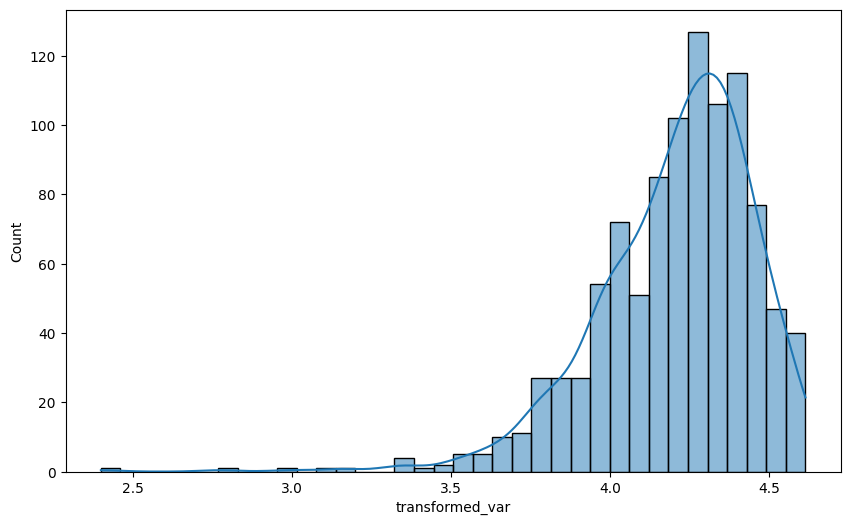

In [106]:
df['transformed_var'] = np.log(df['writing score']+1)
plt.figure(figsize=(10,6))
sns.histplot(df['transformed_var'],kde=True)
plt.show()